## 01-RE Cleaning the Data
#### 01-1 Importing libraries
#### 01-2 Importing file
#### 01-3 Visualizating columns
#### 01-4 Visualizating Null
#### 01-5 Statistic
#### 01-6 Dropping non relevant columns
#### 01-7 Checking the Hypotesis that if 'Property Type' ='Commercial', than 'Residental Type' =NaN: creating subset for commercial Property Type and counting NaNs in columns
#### 01-8 Sostitution of NaNs in 'Property Type' and 'Residential Type' with 'Non Indicated'
#### 01-9 Fixing outliers
#### 01-10 Creating columns Year and Month unstead of Date
#### 01-11 checking dtypes
#### 01-12 saving df


### 01-1 Importing libraries

In [43]:
# Import Libraries
import pandas as pd
import numpy as np
import os

### 01-2 Importing file

In [44]:
path=r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Data'

In [45]:
df_re=pd.read_csv(os.path.join(path,'Original Data','Real_Estate_Sales_2001-2020_GL.csv'))

C:\Users\user\AppData\Local\Temp\ipykernel_7288\1522567735.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_re=pd.read_csv(os.path.join(path,'Original Data','Real_Estate_Sales_2001-2020_GL.csv'))


### 01-3 Column visualization 

In [46]:
df_re.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN
5,200109,2020,12/09/2020,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.6780,Residential,Single Family,NaN,NaN,NaN,NaN
6,2020180,2020,03/01/2021,Berlin,1539 FARMINGTON AVE,234200.0,130000.0,1.8015,Residential,Two Family,08 - Part Interest,NaN,NaN,NaN
7,2020313,2020,07/01/2021,Berlin,216 WATCH HILL RD,412000.0,677500.0,0.6081,Residential,Single Family,NaN,NaN,NaN,NaN
8,200097,2020,06/04/2021,Bethany,23 AMITY RD,511000.0,795000.0,0.6427,Commercial,NaN,NaN,NaN,NaN,NaN
9,20139,2020,12/16/2020,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,0.5115,Residential,Single Family,NaN,NaN,NaN,NaN


### 01-4 Null visualization

In [47]:
print(df_re.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB
None


In [48]:
df_re.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

### visualizating the rows with NaNs  in Address

In [49]:
df_re[df_re['Address'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
66848,39999,2003,02/02/2004,West Haven,NaN,0.0,0.0,0.000000,NaN,NaN,30,NaN,NaN,NaN
66884,49996,2004,05/17/2005,Lisbon,NaN,0.0,0.0,0.000000,NaN,NaN,29,NaN,NaN,NaN
66910,48886,2004,06/13/2005,Lisbon,NaN,0.0,0.0,0.000000,NaN,NaN,29,NaN,NaN,NaN
89023,10537,2001,02/05/2002,Hartford,NaN,0.0,120000.0,0.000000,NaN,NaN,16,NaN,NaN,NaN
92692,10640,2001,12/19/2001,Bridgeport,NaN,2106020.0,45000.0,46.800444,NaN,NaN,25,NaN,NaN,NaN
177917,20280,2002,NaN,Orange,NaN,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
179410,0,2002,NaN,Orange,NaN,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
206062,30125,2003,11/10/2003,New Milford,NaN,55090.0,400000.0,0.137725,NaN,NaN,7.0,NaN,NaN,POINT (-73.41375 41.57871)
219172,39998,2003,08/12/2004,Lisbon,NaN,0.0,0.0,0.000000,NaN,NaN,30.0,NaN,NaN,NaN
227842,30100,2003,05/20/2004,North Stonington,NaN,7210.0,149000.0,0.048389,NaN,NaN,7.0,NaN,NaN,POINT (-71.90452 41.45301)


### Since these rows have many NaNs also in other columns and since these rows take abot 0.005% of database it is justiefed to delete these rows

In [50]:
df_re.shape

(997213, 14)

In [51]:
df_re=df_re.dropna(subset=['Address'])

In [52]:
df_re.shape

(997162, 14)

### 01-05 statistic data of dataset

In [53]:
df_re.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.971620e+05,997162.000000,9.971620e+05,9.971620e+05,9.971620e+05
mean,4.312060e+05,2010.190109,2.791539e+05,3.911574e+05,1.044685e+01
std,6.549386e+06,6.237870,1.670651e+06,5.347402e+06,1.890240e+03
min,8.100000e+01,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867187e-01
50%,7.030400e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518888e+05,2016.000000,2.255800e+05,3.650000e+05,7.852958e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


### 01-6 Droping non relevant columns:  Non Use Code, Assessor Remarks, OPM remarks , Location  (the Data dictionary is here: https://data.ct.gov/Housing-and-Development/Real-Estate-Sales-2001-2020-GL/5mzw-sjtu)

In [54]:
df_re=df_re.drop(['Non Use Code', 'Assessor Remarks', 'OPM remarks' , 'Location'],axis=1)

In [55]:
df_re

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


### 01-7 Checking the Hypotesis that if 'Property Type' ='Commercial', than 'Residental Type' =NaN: creating subset for commercial Property Type and counting NaNs in columns

#### creating subset including only Comercial property type

In [56]:
df_re1=df_re[df_re['Property Type']=='Commercial']

In [57]:
df_re1.shape

(1981, 10)

#### counting NaNs

In [58]:
df_re1.isnull().sum()

Serial Number          0
List Year              0
Date Recorded          0
Town                   0
Address                0
Assessed Value         0
Sale Amount            0
Sales Ratio            0
Property Type          0
Residential Type    1981
dtype: int64

### Conclusion: the residential type by Commercial property type is NaN. Therefore, decide to process the sostitution of these NaNs with 'not residental' to avvoid NaNs in dataset 

###  1-7 The sostitution of NaNs with 'not residental' by 'Property Type'='Commercial'

In [59]:
df_re.loc[df_re['Property Type'] == 'Commercial', 'Residential Type'] = df_re.loc[df_re['Property Type'] == 'Commercial', 'Residential Type'].fillna('Non Residental')

In [60]:
df_re

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


### counting other NaNs

In [61]:
df_re.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382399
Residential Type    386281
dtype: int64

### 01-8 Sostitution of NaNs in 'Property Type' and 'Residential Type' with 'Non Indicated'

In [62]:
df_re.fillna('Non Indicated', inplace=True)

In [63]:
df_re

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


In [64]:
df_re.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64

#### counting other 0 values

In [65]:
count=(df_re==0).sum()

In [66]:
print(count)

Serial Number          0
List Year              0
Date Recorded          0
Town                   0
Address                0
Assessed Value      6897
Sale Amount         1783
Sales Ratio         8423
Property Type          0
Residential Type       0
dtype: int64


### 01-9 Fixinf outliers for future analysis. The outliers are shown in Statistic table (#01-5)

### The outliers are in 'Assessed Value' and 'Sale Amount' columns

### Creating scatterplott for outliers checking

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

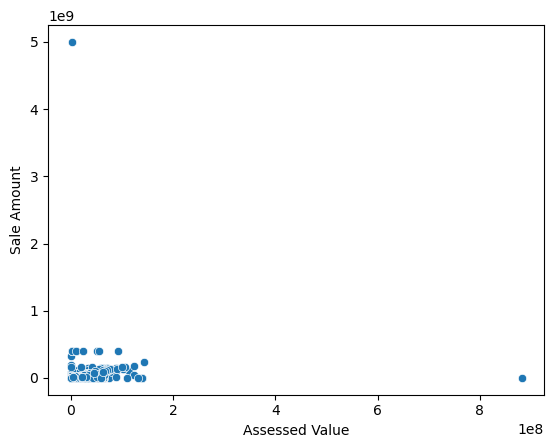

In [68]:
scat=sns.scatterplot(x='Assessed Value', y='Sale Amount', data=df_re)

### Conclusion: there is one outlier, seen also in statistic table. It's to delet from df

In [69]:
df_re_cleaned=df_re[df_re['Assessed Value']<300000000]

In [70]:
df_re_clean=df_re_cleaned[df_re_cleaned['Sale Amount']<300000000]

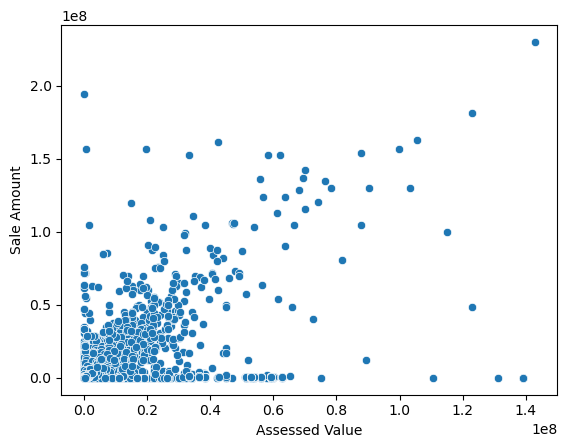

In [71]:
scat=sns.scatterplot(x='Assessed Value', y='Sale Amount', data=df_re_clean)

### 01-10 The follow step is  create=ing columns 'Year' and 'Month' instead of date of sales column ( 'Date Recorded' )

In [72]:
# Convert to datetime
df_re_clean['Date Recorded'] = pd.to_datetime(df_re_clean['Date Recorded'], format='%m/%d/%Y')


C:\Users\user\AppData\Local\Temp\ipykernel_7288\1052262818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re_clean['Date Recorded'] = pd.to_datetime(df_re_clean['Date Recorded'], format='%m/%d/%Y')


In [73]:
# Extract Year and Month
df_re_clean['Year of Sale'] = df_re_clean['Date Recorded'].dt.year


C:\Users\user\AppData\Local\Temp\ipykernel_7288\1984954562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re_clean['Year of Sale'] = df_re_clean['Date Recorded'].dt.year


In [74]:
df_re_clean['Month of Sale'] = df_re_clean['Date Recorded'].dt.month

C:\Users\user\AppData\Local\Temp\ipykernel_7288\2369022245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re_clean['Month of Sale'] = df_re_clean['Date Recorded'].dt.month


In [75]:
df_re_clean

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental,2021,9
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020,10
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021,3
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,2021,4
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,2021,7
...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020,6
997209,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019,11
997210,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020,4
997211,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020,6


In [76]:
df_re_clean.drop('Date Recorded', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7288\4045650778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re_clean.drop('Date Recorded', axis=1, inplace=True)


In [77]:
df_re_clean

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental,2021,9
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020,10
2,200212,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021,3
3,200243,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,2021,4
4,200377,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,2021,7
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020,6
997209,190284,2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019,11
997210,190129,2019,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020,4
997211,190504,2019,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020,6


### 1-11 Checking Dtypes

In [78]:
df_re_clean.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Year of Sale,Month of Sale
count,9.971500e+05,997150.000000,9.971500e+05,9.971500e+05,9.971500e+05,997150.000000,997150.000000
mean,4.311690e+05,2010.190030,2.780083e+05,3.822538e+05,1.044679e+01,2010.940931,6.812797
std,6.549366e+06,6.237864,1.413230e+06,1.420112e+06,1.890251e+03,6.247523,3.237709
min,8.100000e+01,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,1999.000000,1.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867257e-01,2005.000000,4.000000
50%,7.030400e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,2011.000000,7.000000
75%,1.518798e+05,2016.000000,2.255600e+05,3.650000e+05,7.853000e-01,2017.000000,9.000000
max,2.000500e+09,2020.000000,1.428587e+08,2.300436e+08,1.226420e+06,2021.000000,12.000000


In [79]:
df_re_clean.dtypes

Serial Number         int64
List Year             int64
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Year of Sale          int64
Month of Sale         int64
dtype: object

### 01-12 Saving file

In [80]:
df_re_clean.to_csv(os.path.join(path,'Prepared Data','realestate_clean.csv'))